In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('high_diamond_ranked_10min.csv')

In [4]:
df = data.copy()

# Preprocessing

## Droping obvious columns

In [5]:
df = df.drop('gameId', axis=1)

## Selecting encoding, feature engineering and imputation from previous Preprocessing test

In [6]:
from sklearn.preprocessing import StandardScaler

def encoding(df):
    # No need for this dataset, no data with 'object' type
    return df
    
def feature_engineering(df):
    columns = ['blueTotalExperience', 'blueCSPerMin', 'redDeaths', 'redKills', 'redTotalExperience', 'redCSPerMin']
    df = df.drop(columns, axis=1)
    return df

def imputation(df):
    # No need for this dataset, no 'nan' data
    return df
    
def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('blueWins', axis=1)
    y = df['blueWins']
    
    # Standardisation to keep X as a DataFrame
    scaled_features = StandardScaler().fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    
    return X,y

## Train test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

# Evaluation

In [9]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [10]:
# TODO : Drop hypothesis
def evaluation(model):
    X_train, y_train = preprocessing(trainset)
    X_test, y_test = preprocessing(testset)
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
        
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                            cv=4, scoring='f1',
                                            train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

# Model decision

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [12]:
estimators = {
    'RandomForest': RandomForestClassifier(random_state=0),
    'GradientBoosting': GradientBoostingClassifier(random_state=0),
    'SVC' : SVC(random_state=0),
    'KNeighbors': KNeighborsClassifier()
}

RandomForest
[[739 260]
 [297 680]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       999
           1       0.72      0.70      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

GradientBoosting
[[735 264]
 [289 688]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       999
           1       0.72      0.70      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

SVC
[[730 269]
 [288 689]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       999
           1       0.72      0.71      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72  

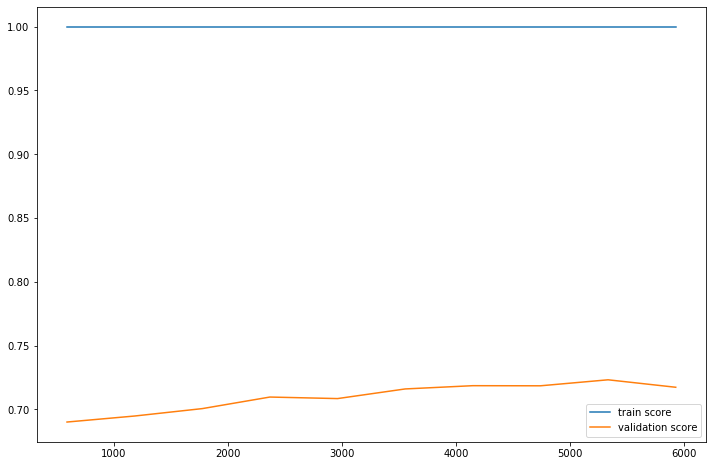

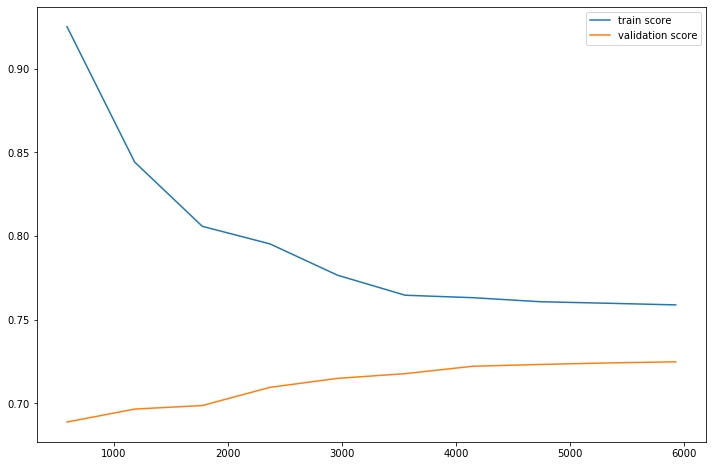

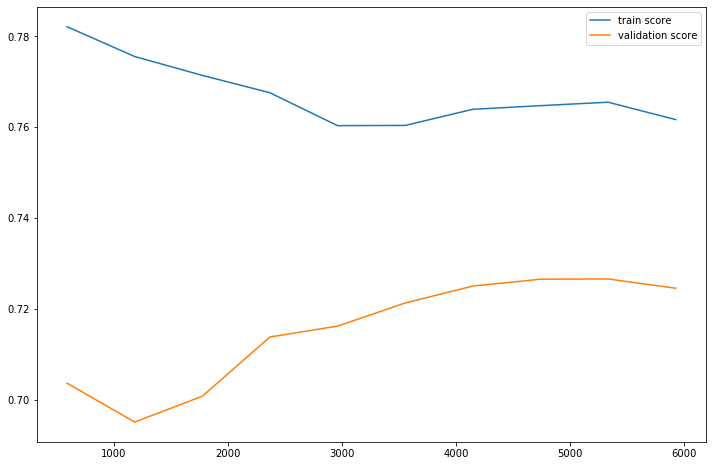

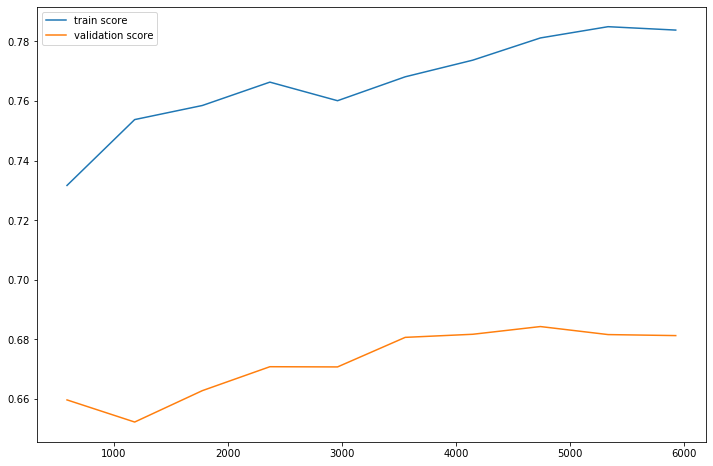

In [13]:
for name_e, estimator in estimators.items():
    print(name_e)
    model = estimator
    evaluation(model)

Gradient Boosting seems promising, let's optimise it

# Model Optilization

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [16]:
model = GradientBoostingClassifier(random_state=0)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
hyper_params = {
    'learning_rate': [0.5, 0.1, 0.05, 0.01],
    'n_estimators': [16, 32, 64, 100, 200],
    'max_depth': np.linspace(2, 32, 16, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'max_features': list(range(1,trainset.shape[1]))
}

In [18]:
grid = RandomizedSearchCV(model, hyper_params, scoring='f1', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\1650

C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\1650

{'n_estimators': 32, 'min_samples_split': 0.4, 'max_features': 25, 'max_depth': 24.0, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       999
           1       0.72      0.71      0.72       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

